In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

In [2]:
import sys
print(sys.executable)

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

/Library/Frameworks/Python.framework/Versions/3.6/bin/python3


Download the latest state and county CSV files

https://github.com/midas-network/COVID-19/tree/master/data/cases/united%20states%20of%20america/nytimes_covid19_data

In [13]:
df_states_data = pd.read_csv("./downloads/20200420_us-states.csv")

In [14]:
df_states_data_sorted = df_states_data.sort_values(by=['state', 'date'])

In [15]:
df_states_data_sorted['new_cases'] = df_states_data_sorted['cases'].diff(1)

df_temp = df_states_data_sorted.fillna(value=0)

df_idx = df_temp['new_cases'] >= 0
state_data_sorted = df_temp[df_idx] 

In [16]:
df_counties = pd.read_csv("./downloads/20200420_us-counties.csv")
df_counties["County_State"] = df_counties['county'] + " " + df_counties['state']

In [17]:
df_counties_sorted = df_counties.sort_values(by=['state', 'county', 'date'])

In [18]:
df_counties_sorted['new_cases'] = df_counties_sorted['cases'].diff(1)

df_temp = df_counties_sorted.fillna(value=0)

df_idx = df_temp['new_cases'] >= 0
counties_data = df_temp[df_idx] 

In [19]:
states = state_data_sorted['state']
unique_states = sp.unique(states)

In [20]:
items1 = ['Choose a state']+sorted(unique_states.tolist())

In [21]:
print(items1)

['Choose a state', 'Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [22]:
import ipywidgets as widgets

v_target1 = widgets.Dropdown(
     options=items1,
    value='New York',
    description='Target:',
    layout={'width': 'max-content'},
    disabled=False,
)
def get_variable(b):
    clear_output
    print(v_target1.value)
    
display(v_target1)

Dropdown(description='Target:', index=35, layout=Layout(width='max-content'), options=('Choose a state', 'Alab…

In [32]:
st1 = str(v_target1.value)
print(st1)

California


In [33]:
date_idx = counties_data['date'] >= '2020-03-24'
df0 = counties_data[date_idx]
state_idx = df0['state'] == st1
df = df0[state_idx]
counties = df['county']
unique_counties = sp.unique(counties)
print(st1)
print("\n" + str(unique_counties))

California

['Alameda' 'Alpine' 'Amador' 'Butte' 'Calaveras' 'Colusa' 'Contra Costa'
 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt' 'Imperial' 'Inyo'
 'Kern' 'Kings' 'Lake' 'Los Angeles' 'Madera' 'Marin' 'Mendocino' 'Merced'
 'Mono' 'Monterey' 'Napa' 'Nevada' 'Orange' 'Placer' 'Plumas' 'Riverside'
 'Sacramento' 'San Benito' 'San Bernardino' 'San Diego' 'San Francisco'
 'San Joaquin' 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara'
 'Santa Cruz' 'Shasta' 'Siskiyou' 'Solano' 'Sonoma' 'Stanislaus' 'Sutter'
 'Tehama' 'Tulare' 'Tuolumne' 'Unknown' 'Ventura' 'Yolo' 'Yuba']


In [34]:
print(','.join("'" + x + "'" for x in unique_counties))

'Alameda','Alpine','Amador','Butte','Calaveras','Colusa','Contra Costa','Del Norte','El Dorado','Fresno','Glenn','Humboldt','Imperial','Inyo','Kern','Kings','Lake','Los Angeles','Madera','Marin','Mendocino','Merced','Mono','Monterey','Napa','Nevada','Orange','Placer','Plumas','Riverside','Sacramento','San Benito','San Bernardino','San Diego','San Francisco','San Joaquin','San Luis Obispo','San Mateo','Santa Barbara','Santa Clara','Santa Cruz','Shasta','Siskiyou','Solano','Sonoma','Stanislaus','Sutter','Tehama','Tulare','Tuolumne','Unknown','Ventura','Yolo','Yuba'


Depending on the number of counties:
1. For a small list, copy and paste 'Unknown' from the above list into county_list below.
2. For a moderate number, copy and paste half from the above list into county_list below.
3. For a large number of counties, like that found in Texas, copy and paste groups of counties into
   county_list1 - county_list4.

In [ ]:
## Use this default county_list for half the number of state counties, or the single entry 'Unknown'

In [ ]:

county_list = {'Sacramento','San Benito','San Bernardino','San Diego','San Francisco','San Joaquin',
               'San Luis Obispo','San Mateo','Santa Barbara','Santa Clara','Santa Cruz','Shasta',
               'Siskiyou','Solano','Sonoma','Stanislaus','Sutter','Tehama','Tulare','Tuolumne',
               'Unknown','Ventura','Yolo','Yuba'
               
              }


In [ ]:
## Use these four county lists when a state has a large number of counties

In [70]:
county_list1 = {
    
               }

In [71]:
county_list2 = { 

               }

In [72]:
county_list3 = {
    
               }

In [73]:
county_list4 = { 
    
               }

In [ ]:
## Run this code to create two heatmaps

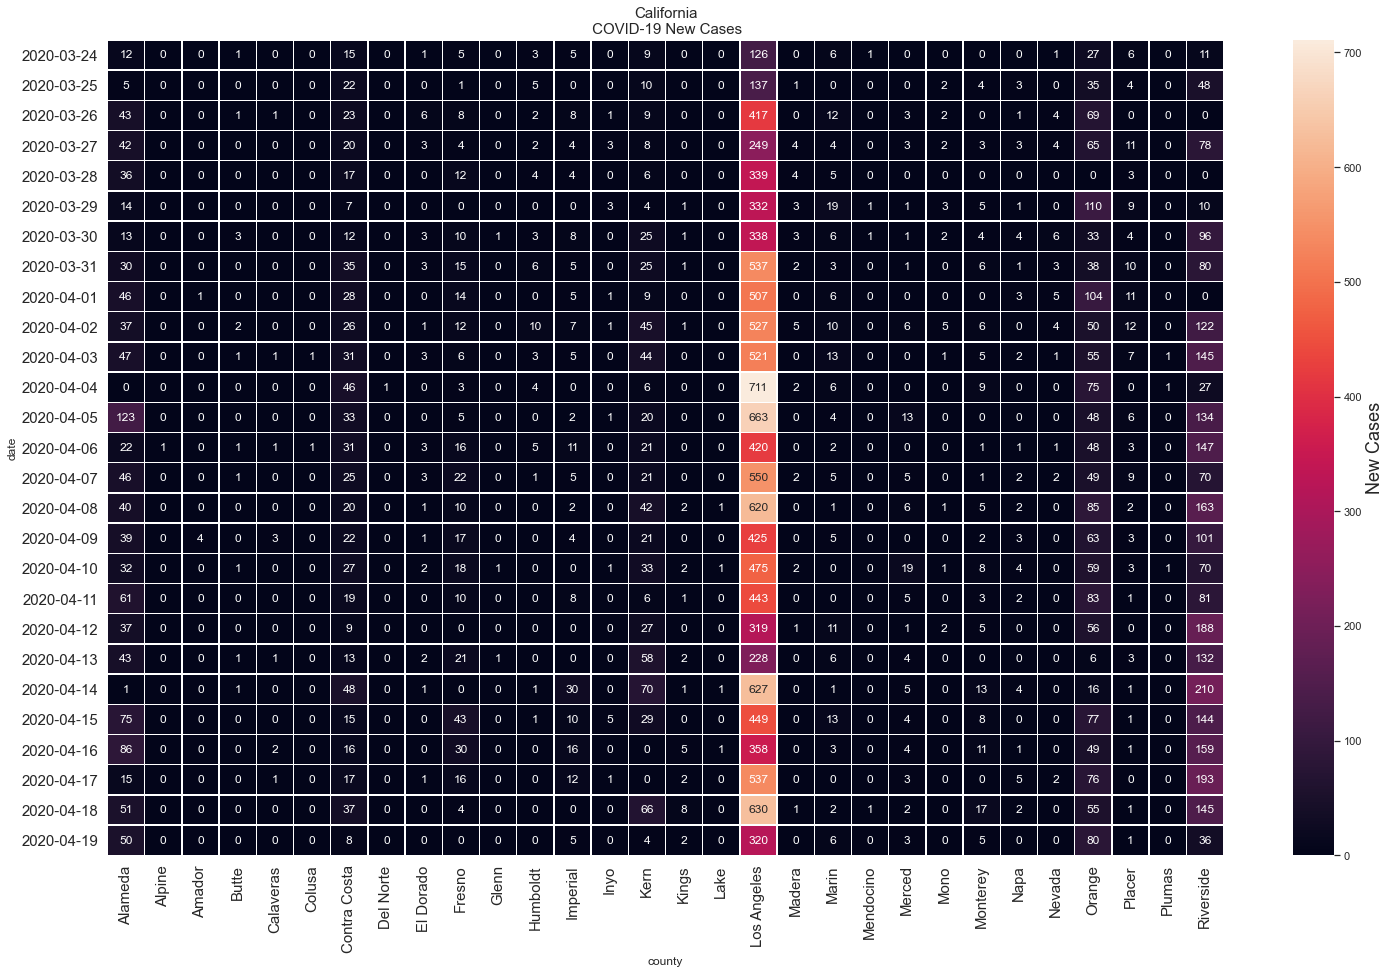

In [37]:
df_list = df.query("county not in @county_list")

temp = df_list.pivot(index='date', columns='county', values='new_cases')
result = temp.fillna(value=0)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(25, 15))
plt.title(str(st1) + "\n COVID-19 New Cases", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
heat_map = sns.heatmap(result, annot=True, fmt="g", linewidths=.5, ax=ax, square=False,
            cbar_kws={'label': 'New Cases'})
heat_map.figure.axes[-1].yaxis.label.set_size(18)
plt.show()

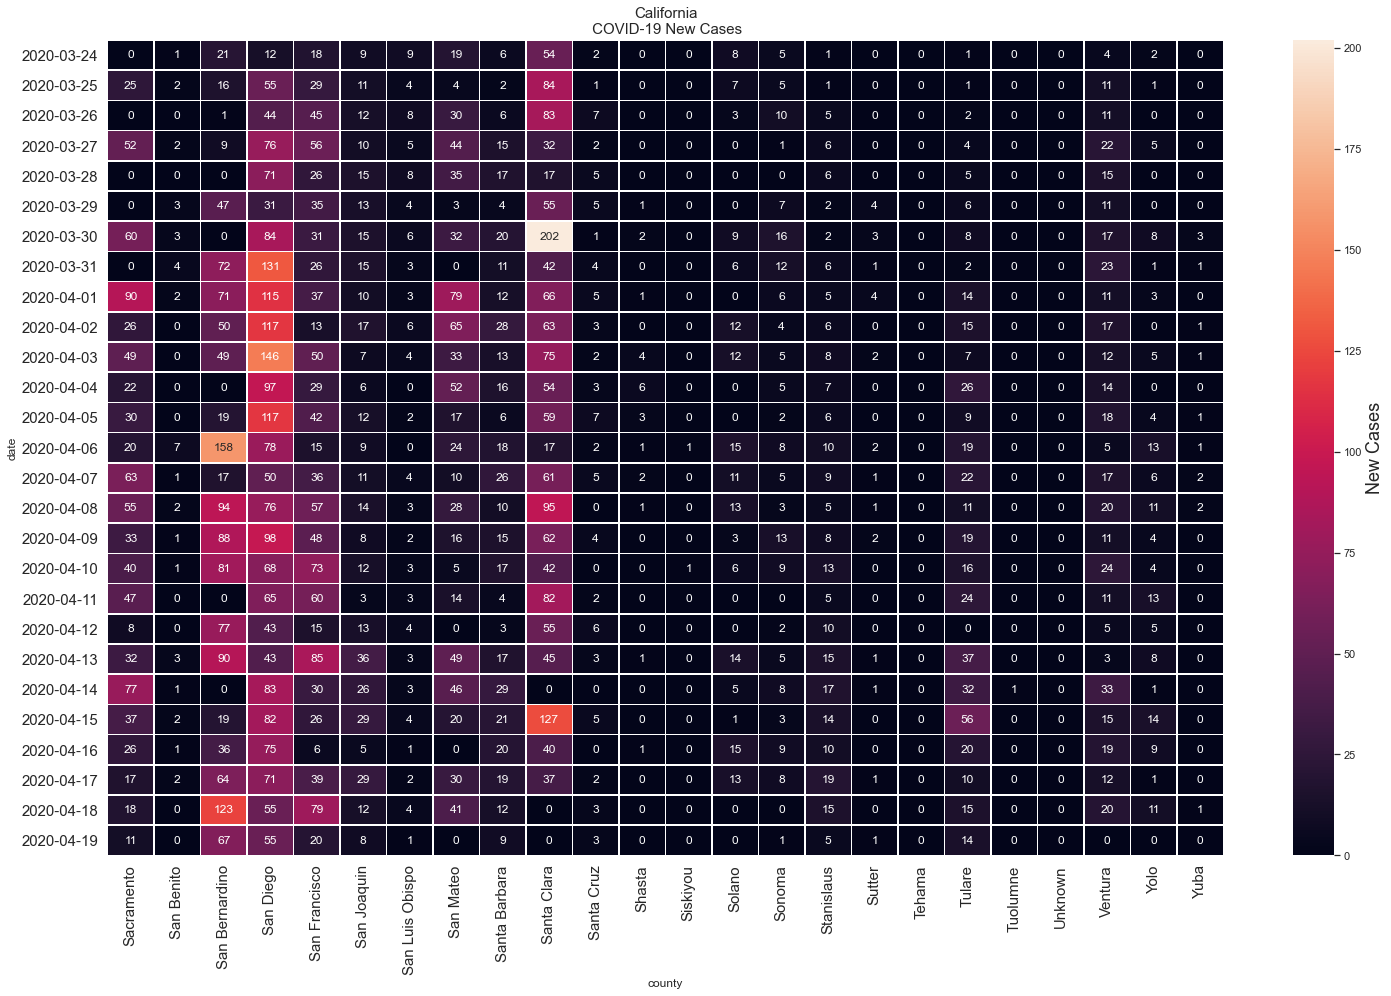

In [38]:
df_list = df.query("county in @county_list")

temp = df_list.pivot(index='date', columns='county', values='new_cases')
result = temp.fillna(value=0)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(25, 15))
plt.title(str(st1) + "\n COVID-19 New Cases", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
heat_map = sns.heatmap(result, annot=True, fmt="g", linewidths=.5, ax=ax, square=False,
            cbar_kws={'label': 'New Cases'})
heat_map.figure.axes[-1].yaxis.label.set_size(18)
plt.show()

In [ ]:
# Run this code when splitting the number of state counties into four lists

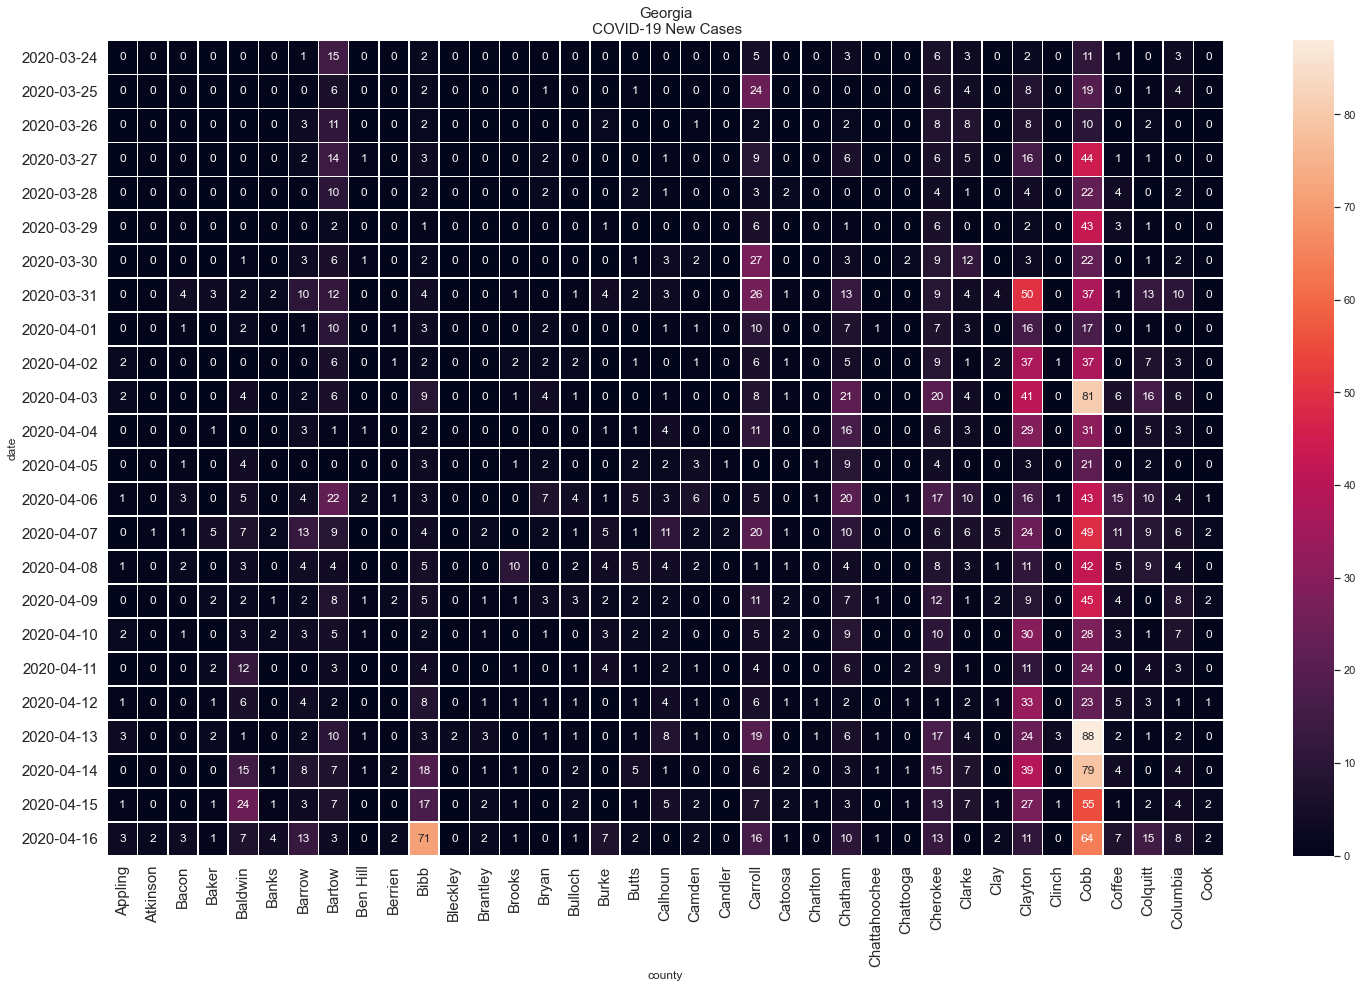

In [74]:
df_list = df.query("county in @county_list1")

temp = df_list.pivot(index='date', columns='county', values='new_cases')
result = temp.fillna(value=0)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(25, 15))
plt.title(str(st1) + "\n COVID-19 New Cases", fontsize=15)
#plt.title(str(st1) + " (Upstate)" + "\n COVID-19 New Cases", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
heat_map = sns.heatmap(result, annot=True, fmt="g", linewidths=.5, ax=ax, square=False,
            cbar_kws={'label': 'New Cases'})
heat_map.figure.axes[-1].yaxis.label.set_size(18)
plt.show()

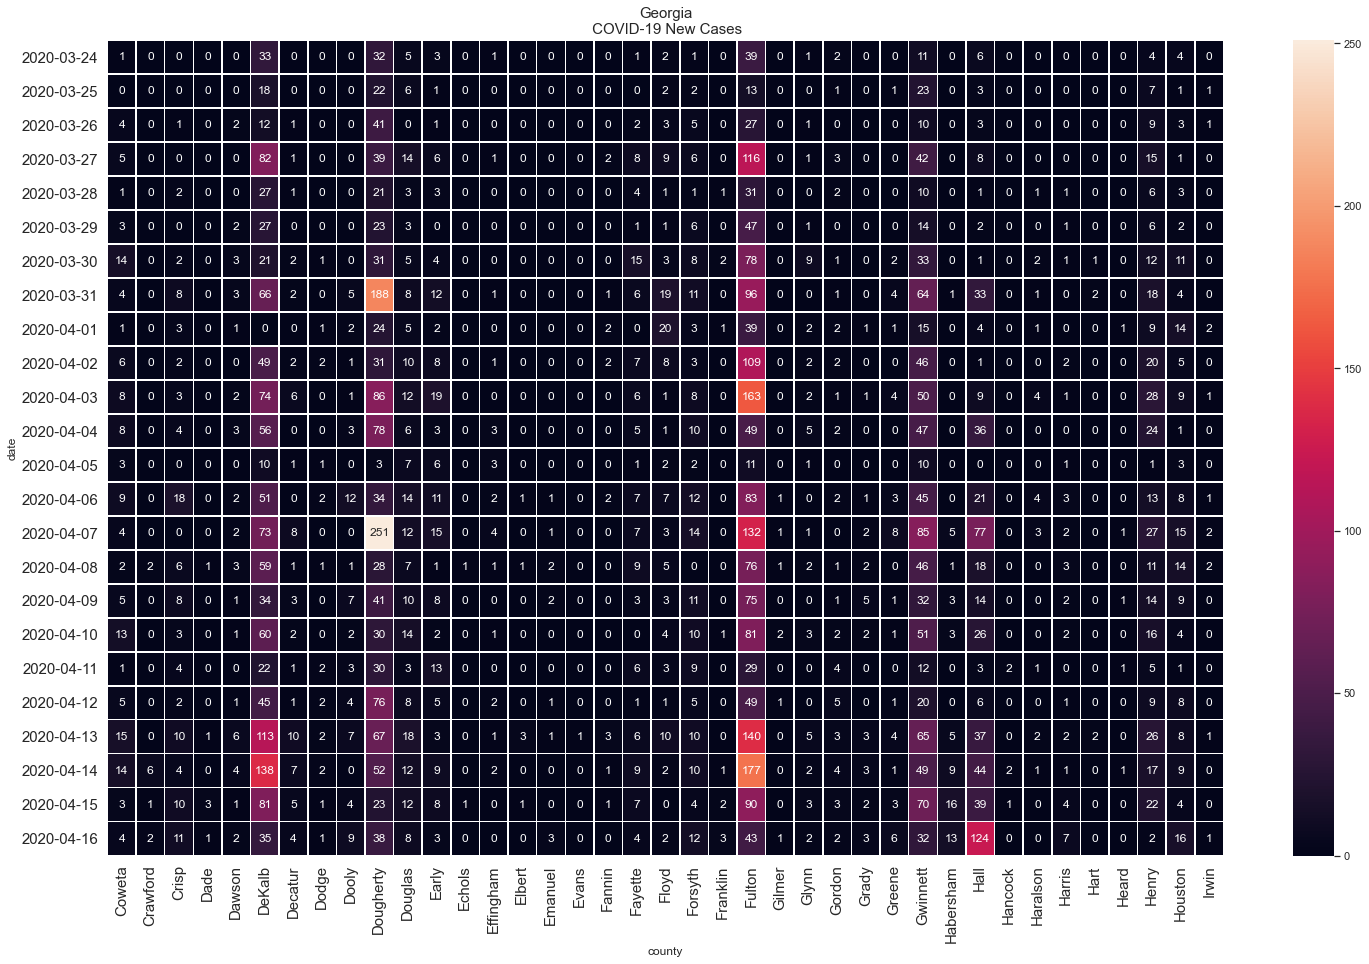

In [75]:
df_list = df.query("county in @county_list2")

temp = df_list.pivot(index='date', columns='county', values='new_cases')
result = temp.fillna(value=0)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(25, 15))
plt.title(str(st1) + "\n COVID-19 New Cases", fontsize=15)
#plt.title(str(st1) + " (Downstate)" + "\n COVID-19 New Cases", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
heat_map = sns.heatmap(result, annot=True, fmt="g", linewidths=.5, ax=ax, square=False,
            cbar_kws={'label': 'New Cases'})
heat_map.figure.axes[-1].yaxis.label.set_size(18)
plt.show()

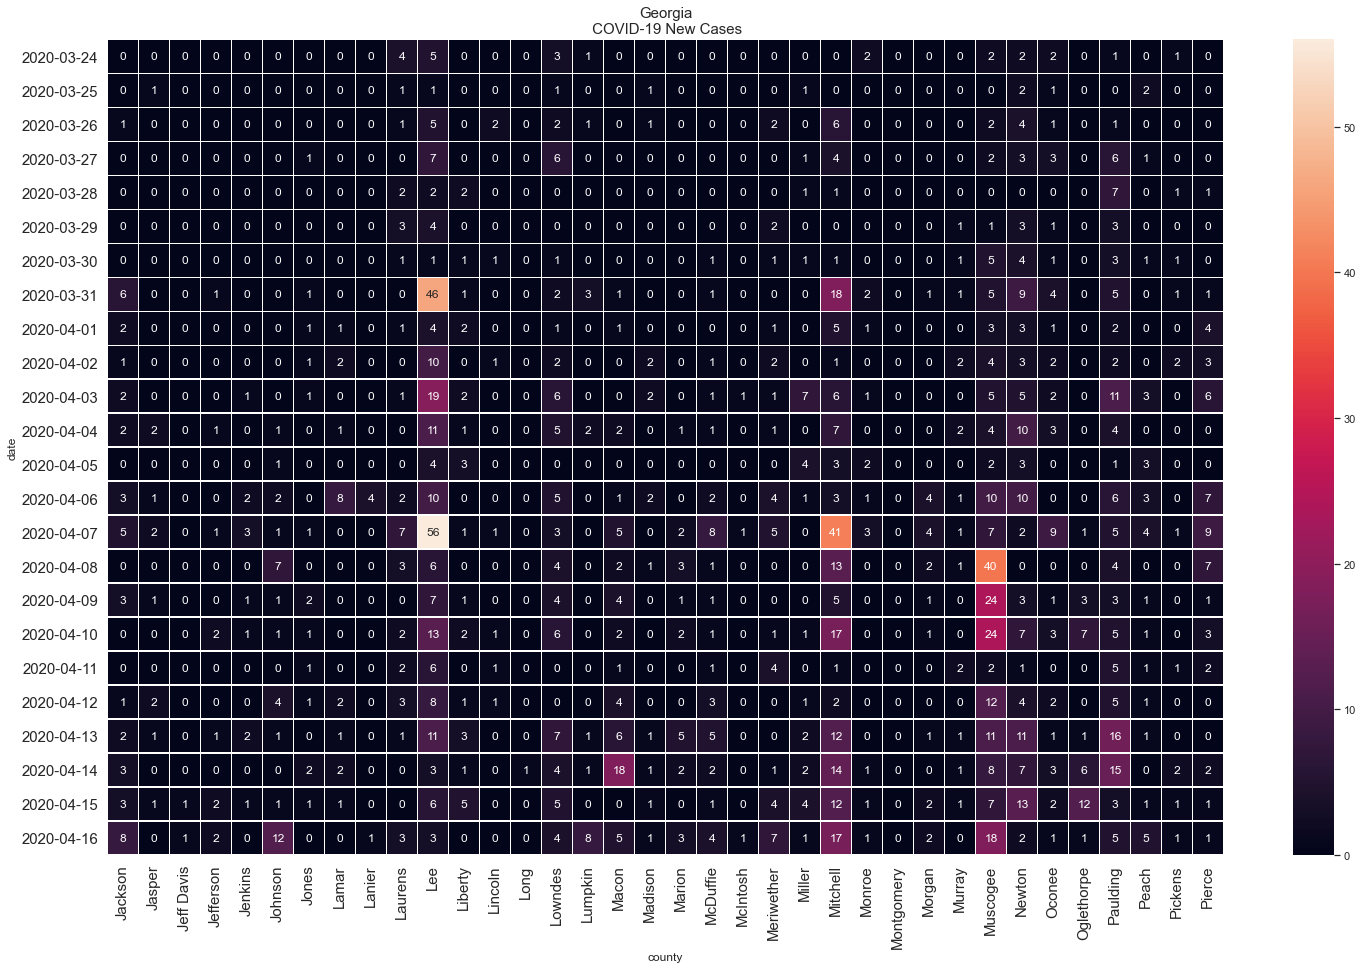

In [76]:
df_list = df.query("county in @county_list3")

temp = df_list.pivot(index='date', columns='county', values='new_cases')
result = temp.fillna(value=0)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(25, 15))
plt.title(str(st1) + "\n COVID-19 New Cases", fontsize=15)
#plt.title(str(st1) + " (Western)" + "\n COVID-19 New Cases", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
heat_map = sns.heatmap(result, annot=True, fmt="g", linewidths=.5, ax=ax, square=False,
            cbar_kws={'label': 'New Cases'})
heat_map.figure.axes[-1].yaxis.label.set_size(18)
plt.show()

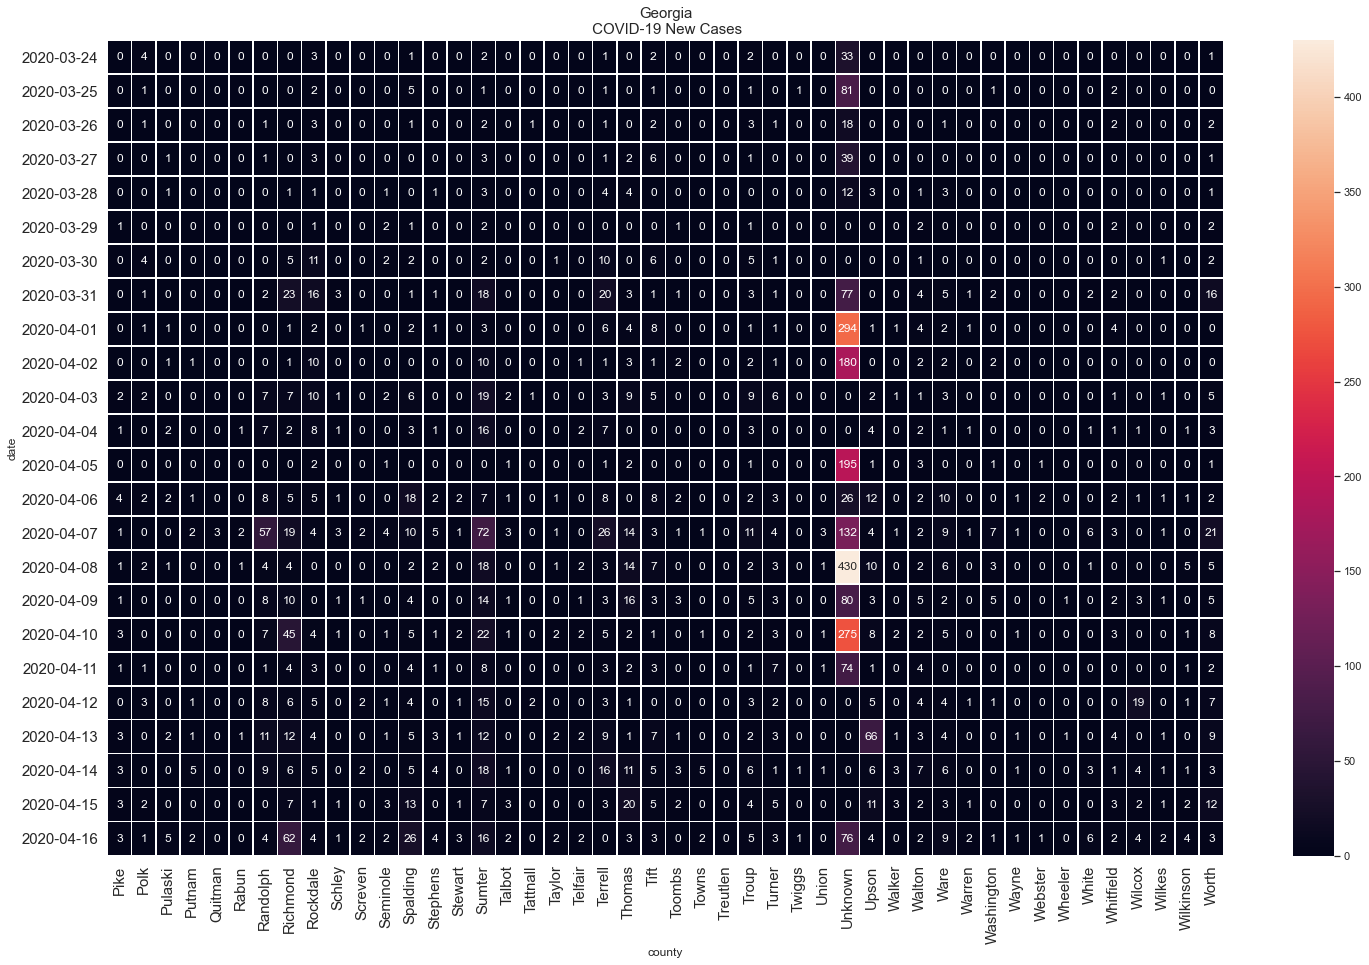

In [77]:
df_list = df.query("county in @county_list4")
temp = df_list.pivot(index='date', columns='county', values='new_cases')
result = temp.fillna(value=0)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(25, 15))
plt.title(str(st1) + "\n COVID-19 New Cases", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
heat_map = sns.heatmap(result, annot=True, fmt="g", linewidths=.5, ax=ax, square=False,
            cbar_kws={'label': 'New Cases'})
heat_map.figure.axes[-1].yaxis.label.set_size(18)
plt.show()

In [ ]:
# Run this sample code when New York State is selected, for three heatmaps: upstate, downstate, and western.

In [82]:
Upstate_list = {'Albany','Clinton','Columbia','Delaware','Essex','Franklin','Fulton','Greene',
                'Hamilton','Herkimer','Jefferson','Lewis','Madison','Montgomery',
                'Oneida','Onondaga','Oswego','Otsego',
                'Rensselaer','Saratoga','Schenectady','Schoharie','St. Lawrence','Warren','Washington',
}

In [83]:
Downstate_list = {'Dutchess','Nassau','New York City','Orange','Putnam','Rockland',
                'Suffolk','Sullivan','Ulster','Unknown','Westchester',}

In [84]:
Western_list = {'Allegany','Broome','Cattaraugus','Cayuga','Chautauqua','Chemung','Chenango',
               'Cortland','Erie',
               'Genesee','Livingston',
               'Monroe','Niagara','Ontario',
               'Orleans',
               'Schuyler','Seneca','Steuben',
               'Tioga','Tompkins','Wayne',
               'Wyoming','Yates'}

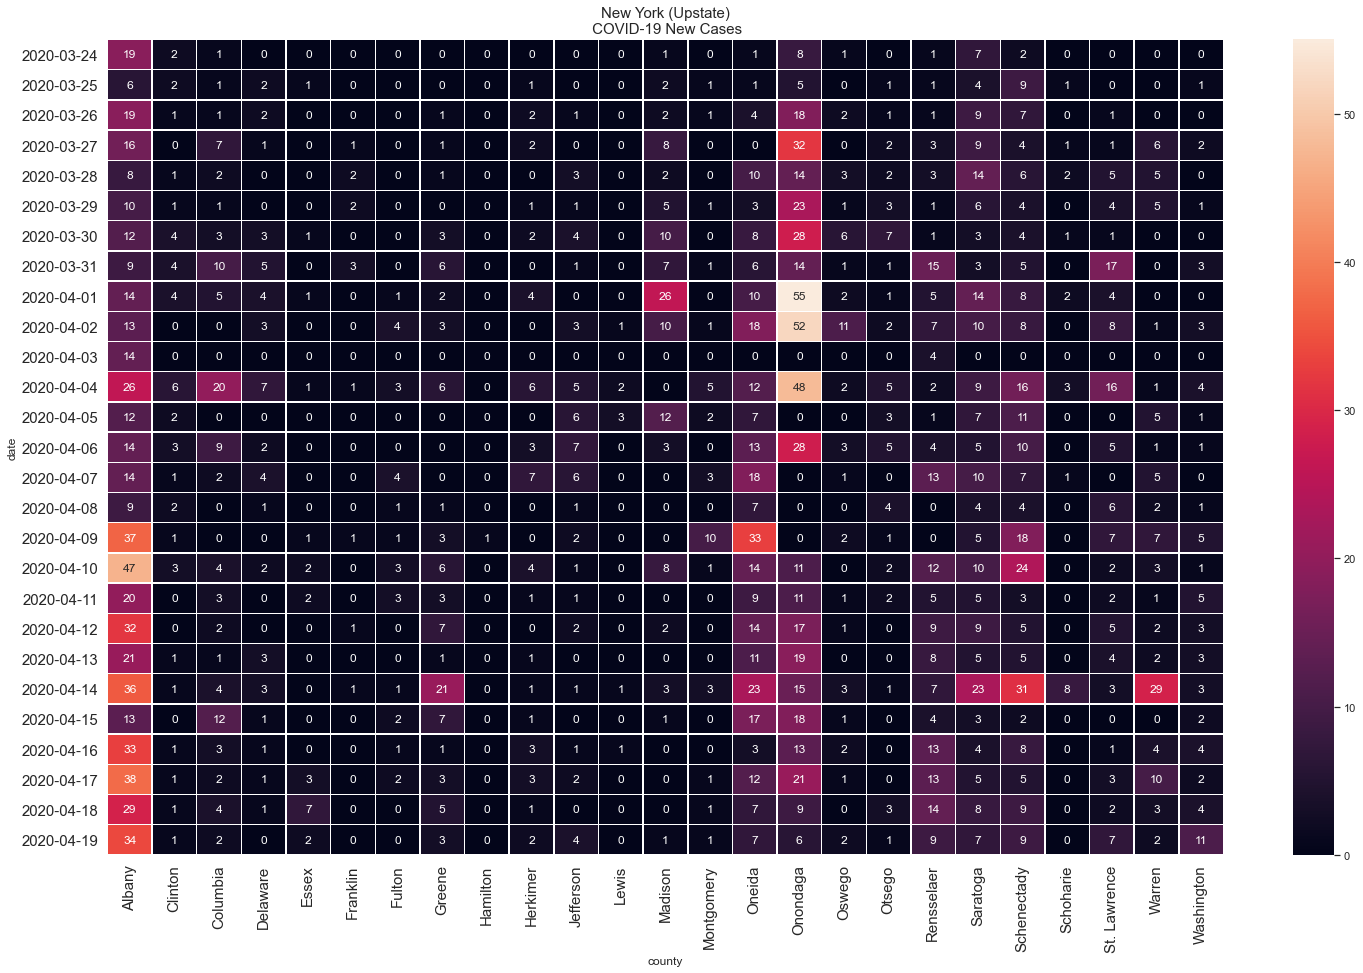

In [85]:

df_list = df.query("county in @Upstate_list")

temp = df_list.pivot(index='date', columns='county', values='new_cases')
result = temp.fillna(value=0)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(25, 15))
#plt.title(str(st1) + "\n COVID-19 New Cases", fontsize=15)
plt.title(str(st1) + " (Upstate)" + "\n COVID-19 New Cases", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
heat_map = sns.heatmap(result, annot=True, fmt="g", linewidths=.5, ax=ax, square=False,
            cbar_kws={'label': 'New Cases'})
heat_map.figure.axes[-1].yaxis.label.set_size(18)
plt.show()

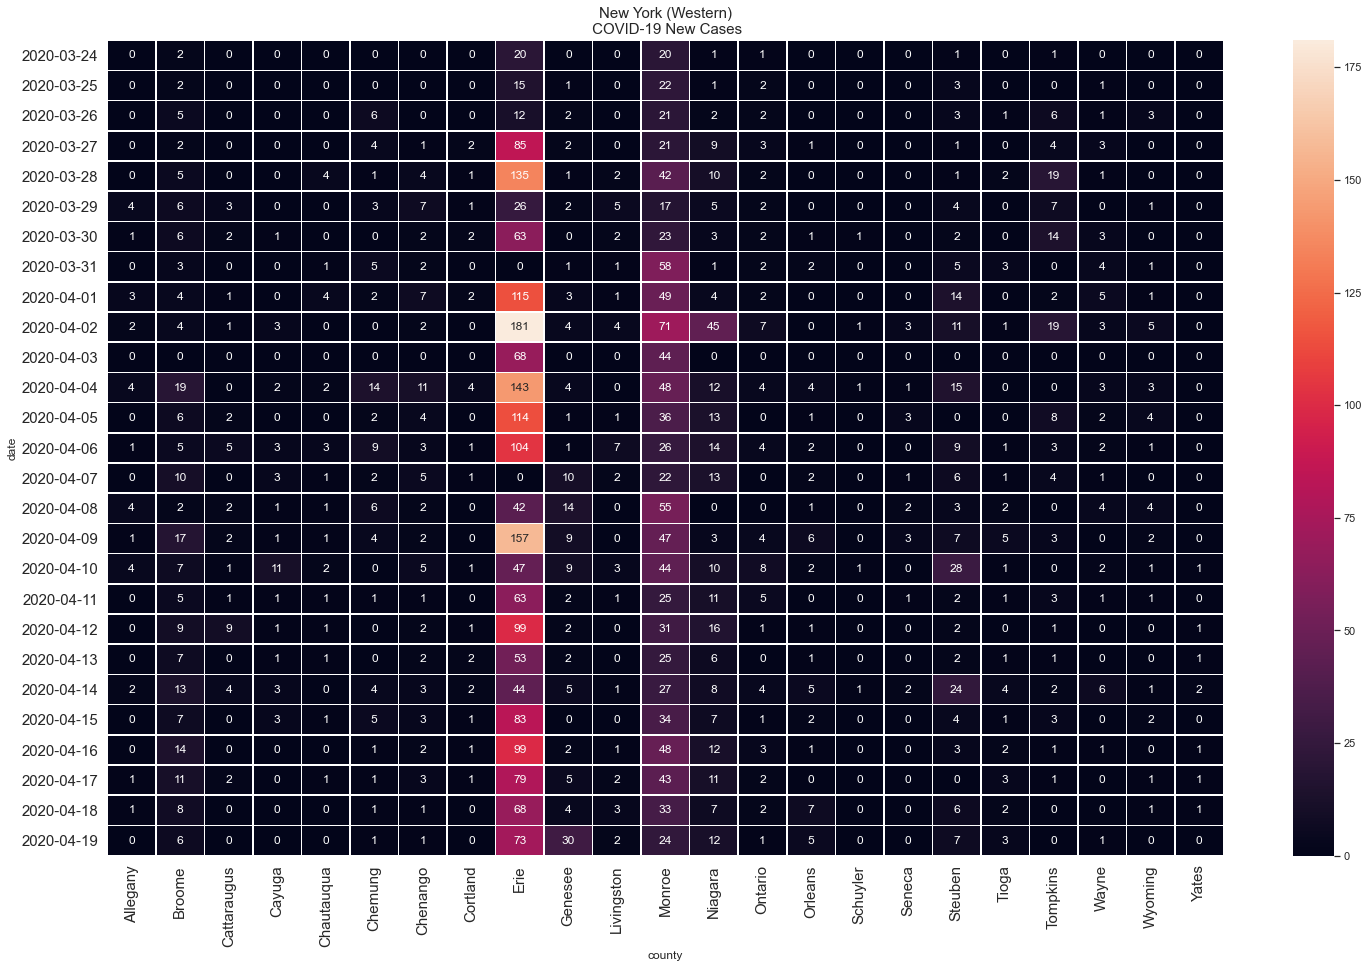

In [87]:

df_list = df.query("county in @Western_list")

temp = df_list.pivot(index='date', columns='county', values='new_cases')
result = temp.fillna(value=0)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(25, 15))
#plt.title(str(st1) + "\n COVID-19 New Cases", fontsize=15)
plt.title(str(st1) + " (Western)" + "\n COVID-19 New Cases", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
heat_map = sns.heatmap(result, annot=True, fmt="g", linewidths=.5, ax=ax, square=False,
            cbar_kws={'label': 'New Cases'})
heat_map.figure.axes[-1].yaxis.label.set_size(18)
plt.show()

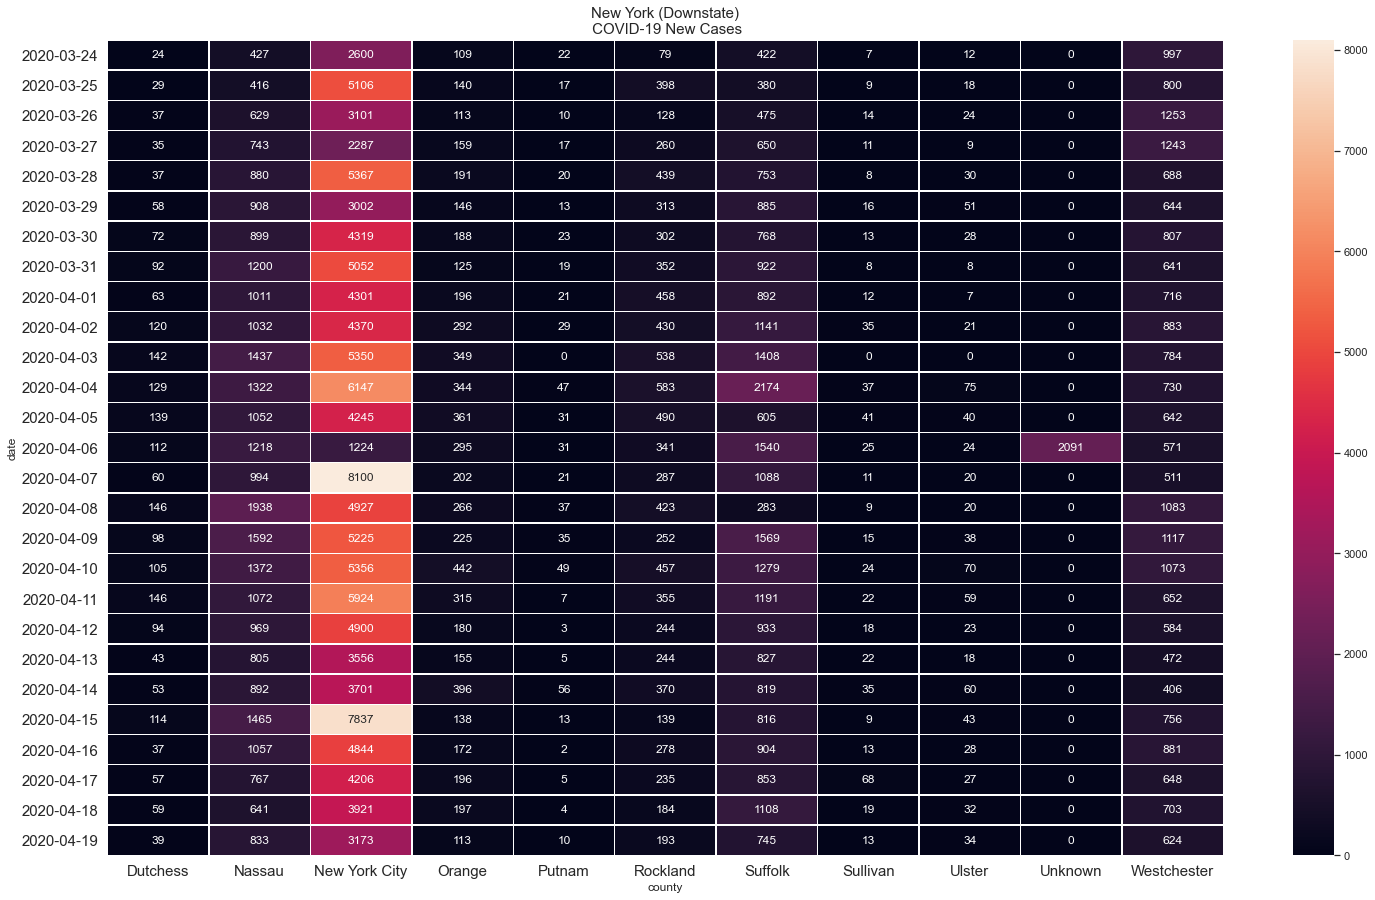

In [86]:

df_list = df.query("county in @Downstate_list")

temp = df_list.pivot(index='date', columns='county', values='new_cases')
result = temp.fillna(value=0)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(25, 15))
#plt.title(str(st1) + "\n COVID-19 New Cases", fontsize=15)
plt.title(str(st1) + " (Downstate)" + "\n COVID-19 New Cases", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
heat_map = sns.heatmap(result, annot=True, fmt="g", linewidths=.5, ax=ax, square=False,
            cbar_kws={'label': 'New Cases'})
heat_map.figure.axes[-1].yaxis.label.set_size(18)
plt.show()